In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = pd.read_csv('network_backup_dataset.csv')

In [3]:
dataset.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,work_flow_2,File_16,0.0,0


In [4]:
df = dataset.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                  'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22,
                                'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 'File_27': 27,
                                'File_28': 28, 'File_29': 29, }})

In [5]:
df.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,1,1,0,0,0.0,0
1,1,1,1,2,12,0.0,0
2,1,1,1,2,13,0.0,0
3,1,1,1,2,14,0.0,0
4,1,1,1,2,16,0.0,0


In [6]:
X = df[
    ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].values
y = df['Size of Backup (GB)'].values

### Part i

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print ("Coefficients:", linreg.coef_)
print ("Intercept:", linreg.intercept_)
y_predict = linreg.predict(X_test)
print("RMSE without cross validation:", np.sqrt(mean_squared_error(y_test, y_predict)))

Coefficients: [ -4.46137250e-05  -2.40527826e-03   1.38306408e-03  -4.14520552e-04
   4.85929375e-04]
Intercept: 0.049413880522
RMSE without cross validation: 0.106503866998


In [38]:
def perform_10fold(X,y,regressor):
    kf = KFold(n_splits=10,random_state = 0)
    i = 1
    bestModel = None
    tr_e = 0
    ts_e = 0
    min_ts_e = 10
    for train_index, test_index in kf.split(X):
        #print("Fold : ",i)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor.fit(X_train,y_train)
        train_preds = regressor.predict(X_train)
        test_preds = regressor.predict(X_test)
        test_error = mean_squared_error(y_test,test_preds)
        tr_e += mean_squared_error(y_train,train_preds)
        ts_e += test_error
        #print("Training RMSE : ",np.sqrt(mean_squared_error(y_train,train_preds)))
        #print("Test RMSE : ",np.sqrt(test_error))
        if(test_error<min_ts_e):
            min_ts_e = test_error
            bestModel = regressor
        i = i+1
    return np.sqrt(tr_e/10),np.sqrt(ts_e/10), bestModel

In [13]:
def plot_graph(x,y,xlabel,ylabel,title):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y, color='blue', lw=1, label=y,s=3)
    #plt.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
    plt.show()

In [14]:
def plot_graph_time(y1,y2,y1label,y2label,ylabel,title):
    plt.title(title)
    plt.scatter(np.arange(y1.shape[0]), y1, color='blue', label=y1label,s=3)
    plt.scatter(np.arange(y1.shape[0]), y2, color='red', label=y2label,s=3)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.show()

In [15]:
regressor = LinearRegression()
avg_tr,avg_ts,bestModel = perform_10fold(X,y,regressor)
print("------------------------------")
print("Average Training RMSE : ",avg_tr)
print("Average Test RMSE : ",avg_ts)

Training RMSE :  0.103243157575
Test RMSE :  0.106718052072
Training RMSE :  0.103966777917
Test RMSE :  0.100184614386
Training RMSE :  0.103225799059
Test RMSE :  0.106849773893
Training RMSE :  0.103946429196
Test RMSE :  0.100367091678
Training RMSE :  0.103195112998
Test RMSE :  0.107115854318
Training RMSE :  0.103938382514
Test RMSE :  0.100445336547
Training RMSE :  0.103202631623
Test RMSE :  0.10705026882
Training RMSE :  0.103936385959
Test RMSE :  0.10046664551
Training RMSE :  0.103200989973
Test RMSE :  0.107074185868
Training RMSE :  0.103991600589
Test RMSE :  0.0999471208611
------------------------------
Average Training RMSE :  0.103585393643
Average Test RMSE :  0.103675847676


In [20]:
regressor = LinearRegression()
regressor.fit(X,y)
predicted = regressor.predict(X)

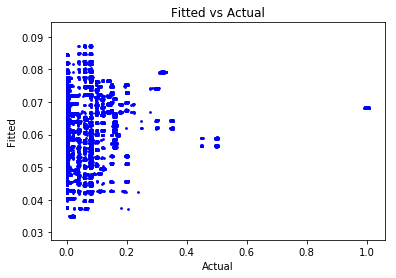

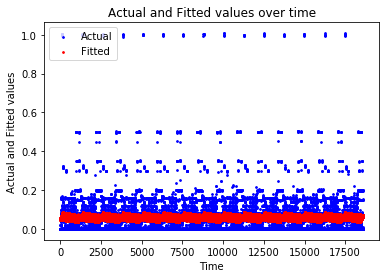

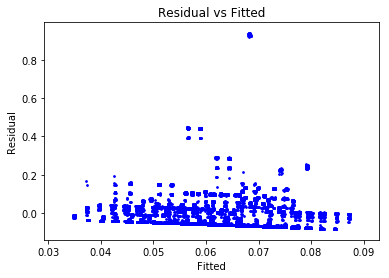

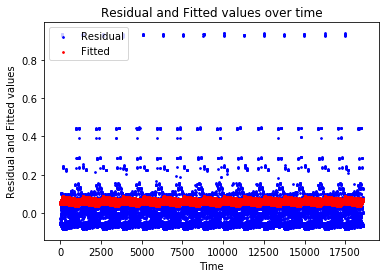

In [21]:
plot_graph(y,predicted,"Actual","Fitted","Fitted vs Actual")
plot_graph_time(y,predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
plot_graph(predicted,y-predicted,"Fitted","Residual","Residual vs Fitted")
plot_graph_time(y-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")

### Part ii

In [22]:
X = df[
    ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].values
y = df['Size of Backup (GB)'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state = 0)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
linreg = LinearRegression()
linreg.fit(X_train_std, y_train)
print ("Coefficients:", linreg.coef_)
print ("Intercept:", linreg.intercept_)
y_predict = linreg.predict(X_test_std)
print("RMSE without cross validation:", np.sqrt(mean_squared_error(y_test, y_predict)))

Coefficients: [-0.00019274 -0.00479403  0.00944936 -0.00058665  0.00420832]
Intercept: 0.0607646798087
RMSE without cross validation: 0.106503866998


C:\Users\shivu.soman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [24]:
def perform_10fold_std(X,y,regressor):
    kf = KFold(n_splits=10,random_state = 0,shuffle = True)
    i = 1
    bestModel = None
    tr_e = 0
    ts_e = 0
    min_ts_e = 10
    for train_index, test_index in kf.split(X):
        print("Fold : ",i)
        scaler = StandardScaler()
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scaler.fit_transform(X_train)
        scaler.transform(X_test)
        regressor.fit(X_train,y_train)
        train_preds = regressor.predict(X_train)
        test_preds = regressor.predict(X_test)
        test_error = mean_squared_error(y_test,test_preds)
        tr_e += mean_squared_error(y_train,train_preds)
        ts_e += test_error
        print("Training RMSE : ",np.sqrt(mean_squared_error(y_train,train_preds)))
        print("Test RMSE : ",np.sqrt(test_error))
        if(test_error<min_ts_e):
            min_ts_e = test_error
            bestModel = regressor
        i = i+1
    return np.sqrt(tr_e/10),np.sqrt(ts_e/10), bestModel

In [25]:
regressor = LinearRegression()
avg_tr,avg_ts,bestModel = perform_10fold_std(X,y,regressor)
print("------------------------------")
print("Average Training RMSE : ",avg_tr)
print("Average Test RMSE : ",avg_ts)

Fold :  1
Training RMSE :  0.103265021252
Test RMSE :  0.106503866998
Fold :  2
Training RMSE :  0.103428926322
Test RMSE :  0.105029409306
Fold :  3
Training RMSE :  0.101891490799
Test RMSE :  0.117793845398
Fold :  4
Training RMSE :  0.104325747394
Test RMSE :  0.0967244993663
Fold :  5
Training RMSE :  0.104118712604
Test RMSE :  0.0987136373113
Fold :  6
Training RMSE :  0.104606731957
Test RMSE :  0.0939770759809
Fold :  7
Training RMSE :  0.103710941139
Test RMSE :  0.102543127434
Fold :  8
Training RMSE :  0.102680720217
Test RMSE :  0.111465416023
Fold :  9
Training RMSE :  0.103622312889
Test RMSE :  0.103306632317
Fold :  10
Training RMSE :  0.104198598987
Test RMSE :  0.0979498611003
------------------------------
Average Training RMSE :  0.103587856885
Average Test RMSE :  0.103627896737


C:\Users\shivu.soman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [26]:
X2 = scaler.fit_transform(X)
regressor.fit(X2,y)
predicted = regressor.predict(X2)

C:\Users\shivu.soman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


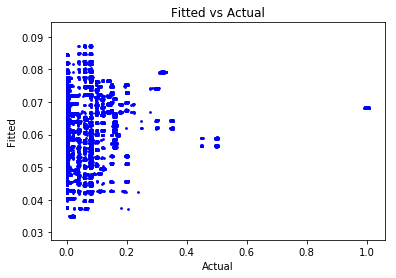

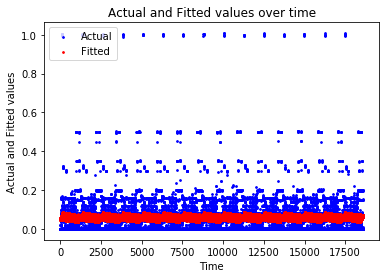

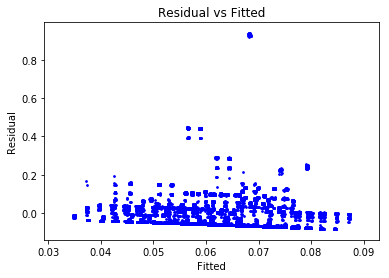

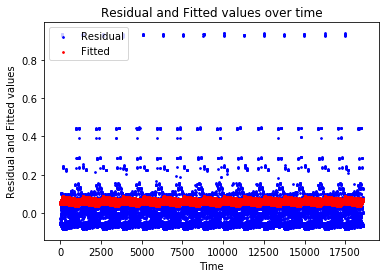

In [27]:
plot_graph(y,predicted,"Actual","Fitted","Fitted vs Actual")
plot_graph_time(y,predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
plot_graph(predicted,y-predicted,"Fitted","Residual","Residual vs Fitted")
plot_graph_time(y-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")

### Part iii

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

In [29]:
X = df[
    ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].values
y = df['Size of Backup (GB)'].values

In [30]:
selectbest = SelectKBest(f_regression,k=3)
X_f = selectbest.fit_transform(X, y)
selectbest.scores_

array([  8.45006257e-03,   3.88163798e+01,   1.50740934e+02,
         2.61386654e+01,   2.53200943e+01])

#### Best features from f_regression = Day of the week, Backup time - hour of day, workflow id

In [31]:
selectbest2 = SelectKBest(mutual_info_regression,k=3)
X_mi = selectbest2.fit_transform(X, y)
selectbest2.scores_

C:\Users\shivu.soman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


array([ 0.00722304,  0.22662073,  0.23314482,  0.27430777,  0.43033917])

#### Best features from mutual_info_regression = Backup time - hour of day, workflow id, file name

In [32]:
regressor = LinearRegression()
avg_tr,avg_ts,bestModel_f = perform_10fold(X_f,y,regressor)
print("------------------------------")
print("Average Training RMSE : ",avg_tr)
print("Average Test RMSE : ",avg_ts)

Training RMSE :  0.103243693315
Test RMSE :  0.106703921572
Training RMSE :  0.103967592085
Test RMSE :  0.10017006517
Training RMSE :  0.103225856311
Test RMSE :  0.106848983926
Training RMSE :  0.103946646253
Test RMSE :  0.100364814404
Training RMSE :  0.103195198107
Test RMSE :  0.107115636526
Training RMSE :  0.103938426941
Test RMSE :  0.100445512392
Training RMSE :  0.103202884586
Test RMSE :  0.107047633732
Training RMSE :  0.103936467419
Test RMSE :  0.100464690829
Training RMSE :  0.103201641248
Test RMSE :  0.107064190055
Training RMSE :  0.103991747011
Test RMSE :  0.0999416817071
------------------------------
Average Training RMSE :  0.103585682142
Average Test RMSE :  0.103670661831


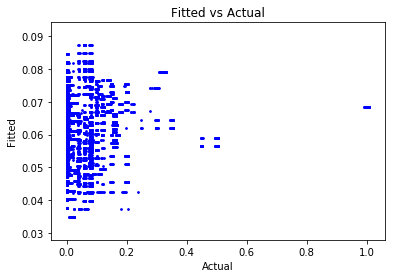

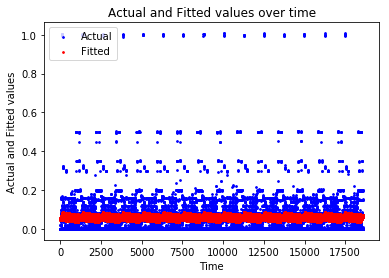

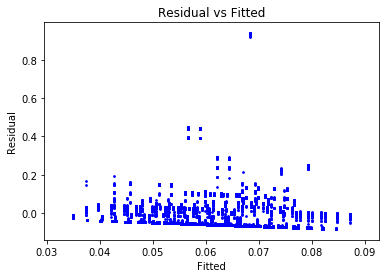

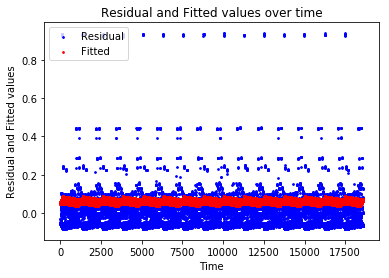

In [33]:
regressor.fit(X_f,y)
predicted = regressor.predict(X_f)
plot_graph(y,predicted,"Actual","Fitted","Fitted vs Actual")
plot_graph_time(y,predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
plot_graph(predicted,y-predicted,"Fitted","Residual","Residual vs Fitted")
plot_graph_time(y-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")

In [34]:
regressor = LinearRegression()
avg_tr,avg_ts,bestModel_mi = perform_10fold(X_mi,y,regressor)
print("------------------------------")
print("Average Training RMSE : ",avg_tr)
print("Average Test RMSE : ",avg_ts)

Training RMSE :  0.103344438318
Test RMSE :  0.10687608756
Training RMSE :  0.104085466786
Test RMSE :  0.100186646413
Training RMSE :  0.103325621354
Test RMSE :  0.107030075687
Training RMSE :  0.104063726743
Test RMSE :  0.100390291344
Training RMSE :  0.103294452926
Test RMSE :  0.107301128015
Training RMSE :  0.104056690265
Test RMSE :  0.100458245785
Training RMSE :  0.103304044324
Test RMSE :  0.107216917862
Training RMSE :  0.104054198375
Test RMSE :  0.100482659732
Training RMSE :  0.1033002603
Test RMSE :  0.10725446069
Training RMSE :  0.104109398463
Test RMSE :  0.09996116867
------------------------------
Average Training RMSE :  0.103694528194
Average Test RMSE :  0.103772293071


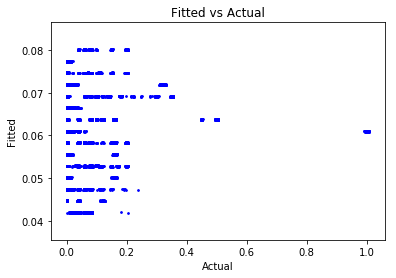

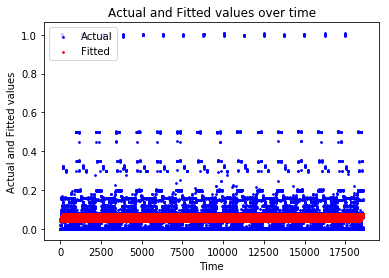

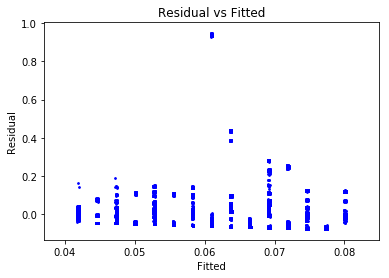

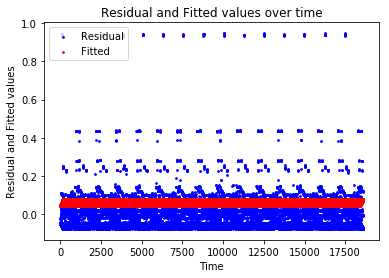

In [35]:
regressor.fit(X_mi,y)
predicted = regressor.predict(X_mi)
plot_graph(y,predicted,"Actual","Fitted","Fitted vs Actual")
plot_graph_time(y,predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
plot_graph(predicted,y-predicted,"Fitted","Residual","Residual vs Fitted")
plot_graph_time(y-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")

### Part iv

In [39]:
mask = []
for i in range(0,6):
    for j in itertools.combinations([0,1,2,3,4],i):
        mask_temp = [False,False,False,False,False]
        for index in j:
            mask_temp[index] = True
        mask.append(mask_temp)

In [40]:
#Without one hot encoding
tr_l = []
ts_l = []
print("Encoding : ",mask[0])
regressor = LinearRegression()
avg_tr,avg_ts,bestModel = perform_10fold(X,y,regressor)
tr_l.append(avg_tr)
ts_l.append(avg_ts)
print("Average Training RMSE : ",avg_tr)
print("Average Test RMSE : ",avg_ts)
#predicted = bestModel.predict(X)
#plot_graph_time(y,predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
#plot_graph_time(y-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")
min_ts_e = avg_ts
bestModel_all = bestModel
best_mask = mask[0]
comb_num = 0

Encoding :  [False, False, False, False, False]
Average Training RMSE :  0.103585393643
Average Test RMSE :  0.103675847676


In [41]:
for i in range(1,32):
    print("##############################")
    print("Encoding : ",mask[i])
    encoder = OneHotEncoder(categorical_features = mask[i])
    X_encoded = encoder.fit_transform(X).toarray()
    regressor = LinearRegression()
    avg_tr,avg_ts,bestModel = perform_10fold(X_encoded,y,regressor)
    tr_l.append(avg_tr)
    ts_l.append(avg_ts)
    print("Average Training RMSE : ",avg_tr)
    print("Average Test RMSE : ",avg_ts)
    #predicted = bestModel.predict(X_encoded)
    #plot_graph(y,predicted,"Actual","Fitted","Fitted vs Actual")
    #plot_graph_time(y,predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
    #plot_graph(predicted,y-predicted,"Fitted","Residual","Residual vs Fitted")
    #plot_graph_time(y-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")
    if(avg_ts<min_ts_e):
            min_ts_e = avg_ts
            min_tr_e = avg_tr
            bestModel_all = bestModel
            best_mask = mask[i]
            comb_num = i
print("--------------------------------")
print("Best Combination : ",best_mask)
print("Combination Number : ",comb_num)
print("Training RMSE : ",min_tr_e)
print("Test RMSE : ",min_ts_e)
#print("Coefficients : ",bestModel_all.coef_)
#print("Intercept : ",bestModel_all.intercept_)

##############################
Encoding :  [True, False, False, False, False]
Average Training RMSE :  0.103580519421
Average Test RMSE :  9557766082.57
##############################
Encoding :  [False, True, False, False, False]
Average Training RMSE :  0.10215359608
Average Test RMSE :  0.102252844789
##############################
Encoding :  [False, False, True, False, False]
Average Training RMSE :  0.102361679221
Average Test RMSE :  0.102468226473
##############################
Encoding :  [False, False, False, True, False]
Average Training RMSE :  0.0913395330666
Average Test RMSE :  0.0914873383532
##############################
Encoding :  [False, False, False, False, True]
Average Training RMSE :  0.0913372558009
Average Test RMSE :  0.0914982900118
##############################
Encoding :  [True, True, False, False, False]
Average Training RMSE :  0.10214938934
Average Test RMSE :  15709588261.2
##############################
Encoding :  [True, False, True, False, False]


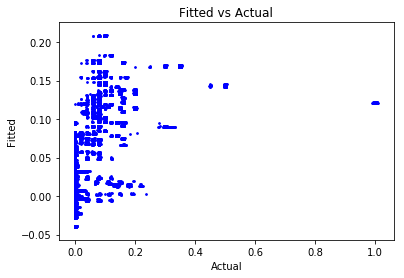

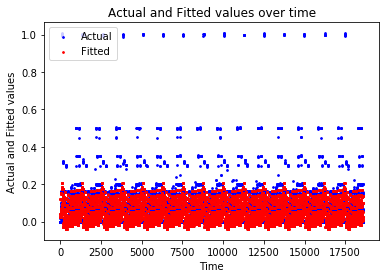

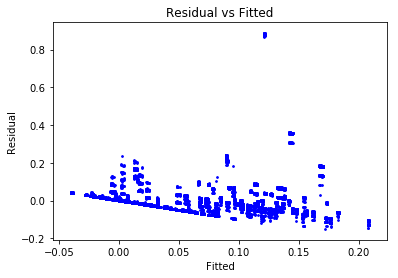

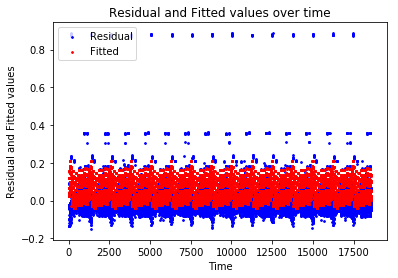

In [43]:
encoder = OneHotEncoder(categorical_features = [False, True, True, False, True])
X_encoded = encoder.fit_transform(X).toarray()
regressor.fit(X_encoded,y)
predicted = regressor.predict(X_encoded)
plot_graph(y,predicted,"Actual","Fitted","Fitted vs Actual")
plot_graph_time(y,predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
plot_graph(predicted,y-predicted,"Fitted","Residual","Residual vs Fitted")
plot_graph_time(y-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")

In [44]:
for i in range(0,32) :
    if ts_l[i] > 1:
        ts_l[i] = 1

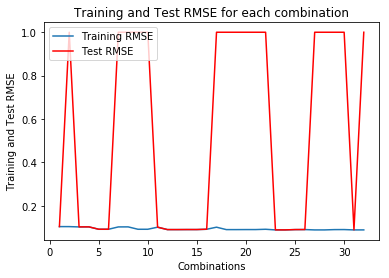

In [45]:
plt.title("Training and Test RMSE for each combination")
plt.plot(range(1,33), tr_l, label="Training RMSE")
plt.plot(range(1,33), ts_l, color='red', label='Test RMSE')
plt.legend(loc = 'upper left')
plt.xlabel("Combinations")
plt.ylabel("Training and Test RMSE")
plt.show()

### Part v

In [121]:
new_ridge = Ridge()
new_lasso = Lasso()
new_elasticnet = ElasticNet()

In [127]:
def partv(regressor,parameters):
    best_score = 10
    for i in range(1,32):
        print("##############################")
        print("Encoding : ",mask[i])
        encoder = OneHotEncoder(categorical_features = mask[i])
        X_encoded = encoder.fit_transform(X).toarray()
        clf = GridSearchCV(regressor, parameters, cv=10,scoring = 'neg_mean_squared_error')
        clf.fit(X_encoded,y)
        score = np.sqrt(-1 * clf.best_score_)
        print("Best Parameter : ",clf.best_params_)
        print("RMSE : ", score)
        if score < best_score:
            best_score = score
            best_param = clf.best_params_
            best_estimator = clf.best_estimator_
            best_mask = mask[i]
    print("---------------------------")
    print("Best Combination : ",best_mask)
    print("Parameter : ",best_param)
    print("Test RMSE : ",best_score)
    print("Coefficients : ",best_estimator.coef_)
    print("Intercept : ",best_estimator.intercept_)

In [128]:
parameters = {'alpha':[0.0001,0.001,0.1,1,10,100,1000,10000]}
partv(new_ridge,parameters)

##############################
Encoding :  [True, False, False, False, False]
Best Parameter :  {'alpha': 10000}
RMSE :  0.103673664218
##############################
Encoding :  [False, True, False, False, False]
Best Parameter :  {'alpha': 10}
RMSE :  0.102231852837
##############################
Encoding :  [False, False, True, False, False]
Best Parameter :  {'alpha': 10}
RMSE :  0.102465499369
##############################
Encoding :  [False, False, False, True, False]
Best Parameter :  {'alpha': 10}
RMSE :  0.0914970533256
##############################
Encoding :  [False, False, False, False, True]
Best Parameter :  {'alpha': 1}
RMSE :  0.0914984086895
##############################
Encoding :  [True, True, False, False, False]
Best Parameter :  {'alpha': 100}
RMSE :  0.102242640467
##############################
Encoding :  [True, False, True, False, False]
Best Parameter :  {'alpha': 100}
RMSE :  0.102551175986
##############################
Encoding :  [True, False, False, T

In [129]:
parameters = {'alpha':[0.0001,0.001,0.1,1,10,100,1000,10000]}
partv(new_lasso,parameters)

##############################
Encoding :  [True, False, False, False, False]
Best Parameter :  {'alpha': 0.001}
RMSE :  0.103671129332
##############################
Encoding :  [False, True, False, False, False]
Best Parameter :  {'alpha': 0.0001}
RMSE :  0.102233153569
##############################
Encoding :  [False, False, True, False, False]
Best Parameter :  {'alpha': 0.0001}
RMSE :  0.102467016538
##############################
Encoding :  [False, False, False, True, False]
Best Parameter :  {'alpha': 0.0001}
RMSE :  0.0914981026218
##############################
Encoding :  [False, False, False, False, True]
Best Parameter :  {'alpha': 0.0001}
RMSE :  0.0915321257068
##############################
Encoding :  [True, True, False, False, False]
Best Parameter :  {'alpha': 0.0001}
RMSE :  0.102232343758
##############################
Encoding :  [True, False, True, False, False]
Best Parameter :  {'alpha': 0.0001}
RMSE :  0.102494247758
##############################
Encoding : 

In [130]:
new_elasticnet = ElasticNet(max_iter = 10000)
parameters = {'alpha':[0.0001,0.001,0.1,1,10,100,1000,10000],'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
partv(new_elasticnet,parameters)

##############################
Encoding :  [True, False, False, False, False]
Best Parameter :  {'alpha': 0.001, 'l1_ratio': 0.5}
RMSE :  0.103670353304
##############################
Encoding :  [False, True, False, False, False]
Best Parameter :  {'alpha': 0.0001, 'l1_ratio': 0.1}
RMSE :  0.10223179185
##############################
Encoding :  [False, False, True, False, False]
Best Parameter :  {'alpha': 0.0001, 'l1_ratio': 0.1}
RMSE :  0.102465502253
##############################
Encoding :  [False, False, False, True, False]
Best Parameter :  {'alpha': 0.0001, 'l1_ratio': 0.1}
RMSE :  0.0914970673675
##############################
Encoding :  [False, False, False, False, True]
Best Parameter :  {'alpha': 0.0001, 'l1_ratio': 0.1}
RMSE :  0.091498284852
##############################
Encoding :  [True, True, False, False, False]
Best Parameter :  {'alpha': 0.0001, 'l1_ratio': 0.7}
RMSE :  0.102232032984
##############################
Encoding :  [True, False, True, False, False]
B